# Pengaruh Genre dan Aktor Film terhadap Rating

In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


with open('New Folder/data.json') as json_data:
    film_data = json.load(json_data)
    
for x in film_data :
    x['rating'] = float(x['rating'])
    
print(pd.DataFrame(film_data, columns=["title", "rating"]))



                                                 title  rating
0                      The Shawshank Redemption (1994)     9.3
1                               The Dark Knight (2008)     9.0
2                                     Inception (2010)     8.8
3                                    Fight Club (1999)     8.8
4                                  Pulp Fiction (1994)     8.9
5                                  Forrest Gump (1994)     8.8
6    The Lord of the Rings: The Fellowship of the R...     8.8
7                                    The Matrix (1999)     8.7
8    The Lord of the Rings: The Return of the King ...     8.9
9                                 The Godfather (1972)     9.2
10                        The Dark Knight Rises (2012)     8.4
11        The Lord of the Rings: The Two Towers (2002)     8.7
12                                        Se7en (1995)     8.6
13                                 Interstellar (2014)     8.6
14                                    Gladiator (2000) 

In [3]:
genre_ratings = {}
genre_rating_count = {}
for x in film_data :
    for y in x['genre'] :
        if y in genre_ratings :
            genre_ratings[y] += x['rating']
            genre_rating_count[y] += 1
        else :
            genre_ratings[y] = x['rating']
            genre_rating_count[y] = 1
for k,v in genre_ratings.items() :
    genre_ratings[k] = v/genre_rating_count[k]
print(genre_ratings)


{'Crime': 7.437566137566133, 'Drama': 7.623744292237444, 'Action': 6.976712328767127, 'Adventure': 7.188046647230327, 'Sci-Fi': 7.060000000000001, 'Romance': 7.2893805309734505, 'Fantasy': 7.128000000000001, 'Thriller': 7.266666666666661, 'Mystery': 7.412745098039213, 'Western': 8.044444444444444, 'War': 7.949999999999999, 'Biography': 7.930188679245284, 'History': 7.732352941176468, 'Comedy': 7.183773584905655, 'Animation': 7.572463768115942, 'Family': 7.347368421052632, 'Horror': 7.0760563380281685, 'Music': 7.540000000000002, 'Sport': 7.65625, 'Musical': 7.3625, 'Film-Noir': 8.5}


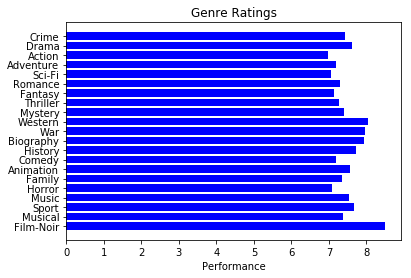

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig,ax = plt.subplots()

gen_keys = list(genre_ratings.keys())

y_pos = np.arange(len(gen_keys))
rating = list(genre_ratings.values())
error = np.random.rand(len(gen_keys))
ax.barh(y_pos, rating, align='center',color='b',ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(gen_keys)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Genre Ratings')
fig_size = [12,9]
plt.rcParams["figure.figsize"] = fig_size

plt.show()

In [5]:
actor_ratings = {}
actor_rating_count = {}
for x in film_data :
    for y in x['casts'] :
        if y['actor'] in actor_ratings :
            actor_ratings[y['actor']] += x['rating']
            actor_rating_count[y['actor']] += 1
        else :
            actor_ratings[y['actor']] = x['rating']
            actor_rating_count[y['actor']] = 1
for k,v in actor_ratings.items() :
    actor_ratings[k] = v/actor_rating_count[k]
print(actor_ratings)


{'Tim Robbins': 7.260000000000001, 'Morgan Freeman': 7.5238095238095255, 'Bob Gunton': 7.525, 'William Sadler': 7.4799999999999995, 'Clancy Brown': 7.460000000000001, 'Gil Bellows': 9.3, 'Mark Rolston': 8.733333333333334, 'James Whitmore': 9.3, 'Jeffrey DeMunn': 8.333333333333334, 'Larry Brandenburg': 9.3, 'Neil Giuntoli': 9.3, 'Brian Libby': 9.3, 'David Proval': 9.3, 'Joseph Ragno': 9.3, 'Jude Ciccolella': 8.200000000000001, 'Christian Bale': 7.693333333333333, 'Heath Ledger': 7.8, 'Aaron Eckhart': 7.279999999999999, 'Michael Caine': 7.783333333333335, 'Maggie Gyllenhaal': 7.775, 'Gary Oldman': 7.5562499999999995, 'Monique Gabriela Curnen': 9.0, 'Ron Dean': 8.233333333333333, 'Cillian Murphy': 7.883333333333333, 'Chin Han': 9.0, 'Nestor Carbonell': 9.0, 'Eric Roberts': 7.75, 'Ritchie Coster': 9.0, 'Anthony Michael Hall': 8.266666666666666, 'Leonardo DiCaprio': 7.752941176470587, 'Joseph Gordon-Levitt': 7.455555555555557, 'Ellen Page': 7.75, 'Tom Hardy': 7.822222222222221, 'Ken Watanab

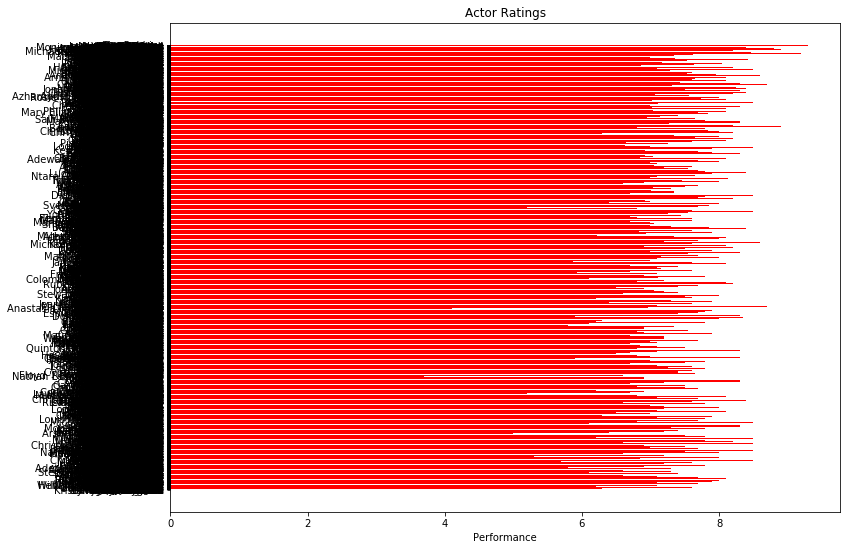

In [6]:
actor_keys = list(actor_ratings.keys())

fig,ax = plt.subplots()

y_pos = np.arange(len(actor_keys))
rating = list(actor_ratings.values())
ax.barh(y_pos, rating, align='center',color='r')
ax.set_yticks(y_pos)
ax.set_yticklabels(actor_keys)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Actor Ratings')
fig_size2 = [121,12]
plt.rcParams["figure.figsize"] = fig_size2

plt.show()

In [23]:
gen_y_count = {}
for x in gen_keys :
    gen_y_count[x] = {}
    
for x in film_data :
    for g in x['genre'] :
        if x['year'] in gen_y_count[g] :
            gen_y_count[g][x['year']] += 1
        else :
            gen_y_count[g][x['year']] = 1
gen_yr = list(gen_y_count.values())
gen_yrc = list(gen_y_count.keys())
for i in range(0,len(gen_yr)):
    yearsg = list(gen_yr[i].keys())
    yearsv = list(gen_yr[i].values())
    for j in range(0,len(yearsg)):
        yearsg[j] = int(yearsg[j])
    gen_yr[i] = {}
    gen_yr[i]['year'] = yearsg
    gen_yr[i]['value'] = yearsv
print(gen_yr)
print(gen_yrc)
    

[{'year': [1994, 2008, 1972, 1995, 1991, 2006, 2013, 1999, 1974, 1998, 2003, 1990, 1992, 2007, 2014, 2005, 2000, 2002, 1971, 1983, 1976, 2004, 1957, 1996, 2009, 2011, 2012, 1997, 2001, 2015, 2010, 2017, 1984, 1962, 1987, 1993, 2016, 1975, 1973, 1969, 1980], 'value': [5, 12, 1, 6, 1, 7, 13, 2, 1, 7, 7, 2, 2, 9, 6, 6, 6, 10, 1, 1, 1, 7, 1, 3, 7, 8, 11, 5, 7, 7, 7, 4, 1, 1, 3, 3, 4, 1, 1, 1, 1]}, {'year': [1994, 2008, 1999, 2001, 2003, 1972, 2002, 1995, 2014, 2000, 2012, 1991, 2009, 1998, 1993, 2006, 1974, 2005, 1997, 1990, 1975, 1992, 2004, 1980, 2007, 2013, 1971, 2011, 1983, 2015, 2010, 1976, 1987, 1996, 1957, 1979, 2017, 2016, 1942, 1988, 1941, 1986, 1989, 1946, 1984, 1985, 1978, 1954, 1962, 1939, 1967, 1973, 1982, 1981, 1963, 1959, 1969, 1936, 1965, 1940, 1950, 1968, 1977], 'value': [7, 23, 12, 15, 10, 1, 16, 6, 19, 12, 23, 2, 19, 9, 7, 20, 2, 15, 14, 5, 3, 4, 24, 3, 20, 20, 1, 24, 1, 16, 14, 2, 3, 7, 2, 2, 7, 13, 1, 4, 1, 3, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [27]:
for i in range(0,len(gen_yr)):
    gen_yr[i]['year'], gen_yr[i]['value'] = (list(t) for t in zip(*sorted(zip(gen_yr[i]['year'], gen_yr[i]['value']))))
print(gen_yr)

maxx = 0
minn = 99999
for x in gen_yr :
    if (maxx < x['year'][len(x['year']) -1]):
        maxx = x['year'][len(x['year']) -1]
    if (minn > x['year'][0]):
        minn = x['year'][0]
print(minn)
print(maxx)
    

[{'year': [1957, 1962, 1969, 1971, 1972, 1973, 1974, 1975, 1976, 1980, 1983, 1984, 1987, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], 'value': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 2, 3, 5, 6, 3, 5, 7, 2, 6, 7, 10, 7, 7, 6, 7, 9, 12, 7, 7, 8, 11, 13, 6, 7, 4, 4]}, {'year': [1936, 1939, 1940, 1941, 1942, 1946, 1950, 1954, 1957, 1959, 1962, 1963, 1965, 1967, 1968, 1969, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], 'value': [1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 1, 2, 3, 1, 2, 1, 2, 2, 3, 3, 4, 2, 5, 2, 4, 7, 7, 6, 7, 14, 9, 12, 12, 15, 16, 10, 24, 15, 20, 20, 23, 19, 14, 24, 23, 20, 19, 16, 13,

In [28]:
g_y_v = []
for i in range(0, len(gen_yr)):
    gv_e = []
    for j in range (minn,maxx + 1):
        if j in gen_yr[i]['year'] :
            gv_e.append(gen_y_count[gen_yrc[i]][str(j)])
        else :
            gv_e.append(0)
    g_y_v.append(gv_e)
print(g_y_v)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 3, 0, 0, 2, 1, 2, 3, 5, 6, 3, 5, 7, 2, 6, 7, 10, 7, 7, 6, 7, 9, 12, 7, 7, 8, 11, 13, 6, 7, 4, 4, 0], [1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 3, 2, 1, 1, 2, 3, 1, 2, 1, 2, 2, 3, 3, 4, 2, 5, 2, 4, 7, 7, 6, 7, 14, 9, 12, 12, 15, 16, 10, 24, 15, 20, 20, 23, 19, 14, 24, 23, 20, 19, 16, 13, 7, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 3, 0, 2, 3, 1, 3, 3, 2, 2, 1, 3, 5, 5, 9, 6, 6, 8, 8, 13, 15, 14, 10, 11, 16, 23, 14, 23, 22, 21, 29, 26, 20, 14, 16, 2], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 3, 3, 2, 2, 1, 3, 8, 4, 8, 5, 7, 10, 10, 11, 6,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\matplotlib\pyplot.py:3261: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\matplotlib\pyplot.py:3261: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\matplotlib\pyplot.py:3261: RuntimeWarning: Second argument 'y3' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\matplotlib\pyplot.py:3261: Runti

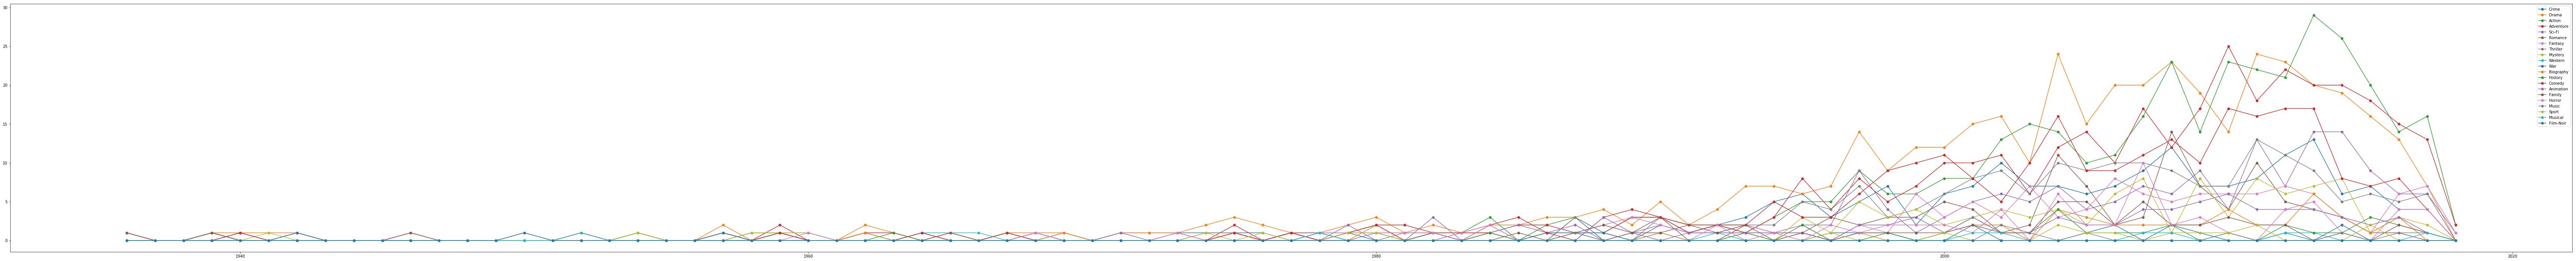

In [36]:
lsss = {'x': list(range(minn,maxx + 1))}
for i in range(0,len(g_y_v)):
    lsss['y' + str(i)] = g_y_v[i]
df = pd.DataFrame(lsss)

for i in range(0,len(g_y_v)):
    plt.plot('x','y'+ str(i), data = df, marker = 'o', label=gen_yrc[i])
plt.legend()
plt.show()